# Networks Using Blocks (VGG)

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

## VGG Blocks:

The basic building block of CNNs is a sequence of the following:

1) a __convolutional layer__ with padding to maintain the resolution
2) a __nonlinearity__ such as ReLU
3) a __poopling layer__ such as max-pooling to reduce the resolution

One of the problems with this approach is that the spatial resolution decreases quite rapidly. In particular, this imposes a hard limit of _log d_ convolutional layers on the network before all dimensions (d) are used. For instance, in the case of ImageNet, it would be impossible to have more than 8 convolutional layers in this way. 

The key idea behind VGG was to use __multiple convolutions in between downsampling via max-pooling in the form of a block__. 

### VGG:

A VGG block consists of a _sequence_ of convolutions with 3 x 3 kernels with padding of 1 (keeping height and width) followed by a 2 x 2 max-pooling layer with stride of 2 (halving height and widht after each block). In resume:

* Convolution with 3 x 3 kernel with padding 1
* 2 x 2 max-pooling with stride of 2

In [2]:
def vgg_block(num_convs, out_channels):
    """returns the implementation of one vgg block
    : num_convs number of convolutional layers
    : num_channels number of output layers"""
    layers = []
    for _ in range(num_convs):
        layers.append(nn.LazyConv2d(out_channels, kernel_size=3, padding=1))
        layers.append(nn.ReLU())
    layers.append(nn.MaxPool2d(kernel_size=2,stride=2))
    return nn.Sequential(*layers)

In [3]:
class VGG(d2l.Classifier):
    def __init__(self, arch, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        conv_blks = []
        for (num_convs, out_channels) in arch:
            conv_blks.append(vgg_block(num_convs, out_channels))
        self.net = nn.Sequential(
            *conv_blks, nn.Flatten(),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(0.5),
            nn.LazyLinear(num_classes))
        self.net.apply(d2l.init_cnn)

In [4]:
VGG(arch=((1, 64), (1, 128), (2, 256), (2, 512), (2, 512))).layer_summary(
    (1, 1, 224, 224))

/home/saturn_matz/miniconda3/envs/d2l/lib/python3.10/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Sequential output shape:	 torch.Size([1, 64, 112, 112])
Sequential output shape:	 torch.Size([1, 128, 56, 56])
Sequential output shape:	 torch.Size([1, 256, 28, 28])
Sequential output shape:	 torch.Size([1, 512, 14, 14])
Sequential output shape:	 torch.Size([1, 512, 7, 7])
Flatten output shape:	 torch.Size([1, 25088])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 10])


## Training

KeyboardInterrupt: 

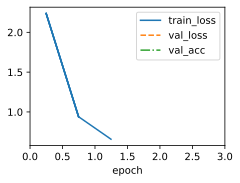

In [5]:
model = VGG(arch=((1, 16), (1, 32), (2, 64), (2, 128), (2, 128)), lr=0.01)
trainer = d2l.Trainer(max_epochs=3, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)